In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/Users/kentbaluyot/Desktop/Labor Force Survey/LFS_sample.xlsx")
df

,Randomizer,Region,C10-Job Indicator,"C11 - Location of Work (Province, Municipality)",C15-Major Industry Group,C16-Nature of Employment (Primary Occupation),Region_Name,Employment_Status,Industry
0,1,7,2,0,0,0,Region VII (Central Visayas),Unemployed,NaN
1,1,19,1,6617,1,1,Autonomous Region in Muslim Mindanao (ARMM),Employed,Agriculture and Forestry
2,2,7,1,4611,96,1,Region VII (Central Visayas),Employed,Other Service Activities
3,3,2,2,0,0,0,Region II (Cagayan Valley),Unemployed,NaN
4,3,13,2,0,0,0,National Capital Region (NCR),Unemployed,NaN
...,...,...,...,...,...,...,...,...,...
379,390,4,1,5624,46,1,Region IV-A (CALABARZON),Employed,Wholesale & Retail Trade
380,391,10,1,4308,96,2,Region X (Northern Mindanao),Employed,Other Service Activities
381,391,13,1,7607,82,1,National Capital Region (NCR),Employed,Admin & Support Services
382,391,6,2,0,0,0,Region VI (Western Visayas),Unemployed,NaN


In [3]:
df['Industry'] = df['Industry'].fillna('NA')

In [4]:
df

,Randomizer,Region,C10-Job Indicator,"C11 - Location of Work (Province, Municipality)",C15-Major Industry Group,C16-Nature of Employment (Primary Occupation),Region_Name,Employment_Status,Industry
0,1,7,2,0,0,0,Region VII (Central Visayas),Unemployed,NA
1,1,19,1,6617,1,1,Autonomous Region in Muslim Mindanao (ARMM),Employed,Agriculture and Forestry
2,2,7,1,4611,96,1,Region VII (Central Visayas),Employed,Other Service Activities
3,3,2,2,0,0,0,Region II (Cagayan Valley),Unemployed,NA
4,3,13,2,0,0,0,National Capital Region (NCR),Unemployed,NA
...,...,...,...,...,...,...,...,...,...
379,390,4,1,5624,46,1,Region IV-A (CALABARZON),Employed,Wholesale & Retail Trade
380,391,10,1,4308,96,2,Region X (Northern Mindanao),Employed,Other Service Activities
381,391,13,1,7607,82,1,National Capital Region (NCR),Employed,Admin & Support Services
382,391,6,2,0,0,0,Region VI (Western Visayas),Unemployed,NA


In [9]:
# Calculate employment statistics by industry and region
# First, let's filter out NA industries and group properly
employment_stats = df[df['Industry'].notna()].groupby(['Industry', 'Region', 'Region_Name', 'Employment_Status']).size().unstack(fill_value=0)

# Calculate totals and rates
employment_stats['Total'] = employment_stats.sum(axis=1)
employment_stats['Employment_Rate'] = (employment_stats['Employed'] / employment_stats['Total'] * 100).round(2)
employment_stats['Unemployment_Rate'] = (employment_stats['Unemployed'] / employment_stats['Total'] * 100).round(2)

# Sort by industry first, then by total population within each industry
employment_stats = employment_stats.sort_values(['Industry', 'Total'], ascending=[True, False])

employment_stats

Employment_Status                                                    Employed  \
Industry                        Region Region_Name                              
Accommodation and Food Services 6      Region VI (Western Visayas)          2   
                                17     MIMAROPA Region                      2   
                                2      Region II (Cagayan Valley)           1   
                                10     Region X (Northern Mindanao)         1   
                                11     Region XI (Davao Region)             1   
...                                                                       ...   
Wholesale & Retail Trade        10     Region X (Northern Mindanao)         2   
                                1      Region I (Ilocos Region)             1   
                                2      Region II (Cagayan Valley)           1   
                                5      Region V (Bicol Region)              1   
                                17     MIMAROPA Region                      1   

Employment_Status                                                    Unemployed  \
Industry                        Region Region_Name                                
Accommodation and Food Services 6      Region VI (Western Visayas)            0   
                                17     MIMAROPA Region                        0   
                                2      Region II (Cagayan Valley)             0   
                                10     Region X (Northern Mindanao)           0   
                                11     Region XI (Davao Region)               0   
...                                                                         ...   
Wholesale & Retail Trade        10     Region X (Northern Mindanao)           0   
                                1      Region I (Ilocos Region)               0   
                                2      Region II (Cagayan Valley)             0   
                                5      Region V (Bicol Region)                0   
                                17     MIMAROPA Region                        0   

Employment_Status                                                    Total  \
Industry                        Region Region_Name                           
Accommodation and Food Services 6      Region VI (Western Visayas)       2   
                                17     MIMAROPA Region                   2   
                                2      Region II (Cagayan Valley)        1   
                                10     Region X (Northern Mindanao)      1   
                                11     Region XI (Davao Region)          1   
...                                                                    ...   
Wholesale & Retail Trade        10     Region X (Northern Mindanao)      2   
                                1      Region I (Ilocos Region)          1   
                                2      Region II (Cagayan Valley)        1   
                                5      Region V (Bicol Region)           1   
                                17     MIMAROPA Region                   1   

Employment_Status                                                    Employment_Rate  \
Industry                        Region Region_Name                                     
Accommodation and Food Services 6      Region VI (Western Visayas)             100.0   
                                17     MIMAROPA Region                         100.0   
                                2      Region II (Cagayan Valley)              100.0   
                                10     Region X (Northern Mindanao)            100.0   
                                11     Region XI (Davao Region)                100.0   
...                                                                              ...   
Wholesale & Retail Trade        10     Region X (Northern Mindanao)            100.0   
                                1      Region I (Ilocos Reg

In [10]:
industry_totals = df[df['Industry'].notna()].groupby(['Industry', 'Employment_Status']).size().unstack(fill_value=0)
industry_totals['Total'] = industry_totals.sum(axis=1)
industry_totals['Employment_Rate'] = (industry_totals['Employed'] / industry_totals['Total'] * 100).round(2)
industry_totals['Unemployment_Rate'] = (industry_totals['Unemployed'] / industry_totals['Total'] * 100).round(2)
industry_totals = industry_totals.sort_values('Total', ascending=False)
industry_totals

Employment_Status,Employed,Unemployed,Total,Employment_Rate,Unemployment_Rate
Industry,,,,,
NA,0,217,217,0.0,100.0
Wholesale & Retail Trade,39,0,39,100.0,0.0
Agriculture and Forestry,34,0,34,100.0,0.0
Transportation and Storage,15,0,15,100.0,0.0
Construction,14,0,14,100.0,0.0
Other Service Activities,11,0,11,100.0,0.0
Education,9,0,9,100.0,0.0
Fishing and Aquaculture,9,0,9,100.0,0.0
Manufacturing,9,0,9,100.0,0.0


In [34]:
industry_totals = industry_totals.reset_index()
industry_totals

Employment_Status,Industry,Employed,Unemployed,Total,Employment_Rate,Unemployment_Rate
0,NA,0,217,217,0.0,100.0
1,Wholesale & Retail Trade,39,0,39,100.0,0.0
2,Agriculture and Forestry,34,0,34,100.0,0.0
3,Transportation and Storage,15,0,15,100.0,0.0
4,Construction,14,0,14,100.0,0.0
5,Other Service Activities,11,0,11,100.0,0.0
6,Education,9,0,9,100.0,0.0
7,Fishing and Aquaculture,9,0,9,100.0,0.0
8,Manufacturing,9,0,9,100.0,0.0
9,Accommodation and Food Services,8,0,8,100.0,0.0


In [35]:
industry_totals = industry_totals.reset_index()
industry_totals.to_excel("LFS_industry_totals.xlsx", index=False)

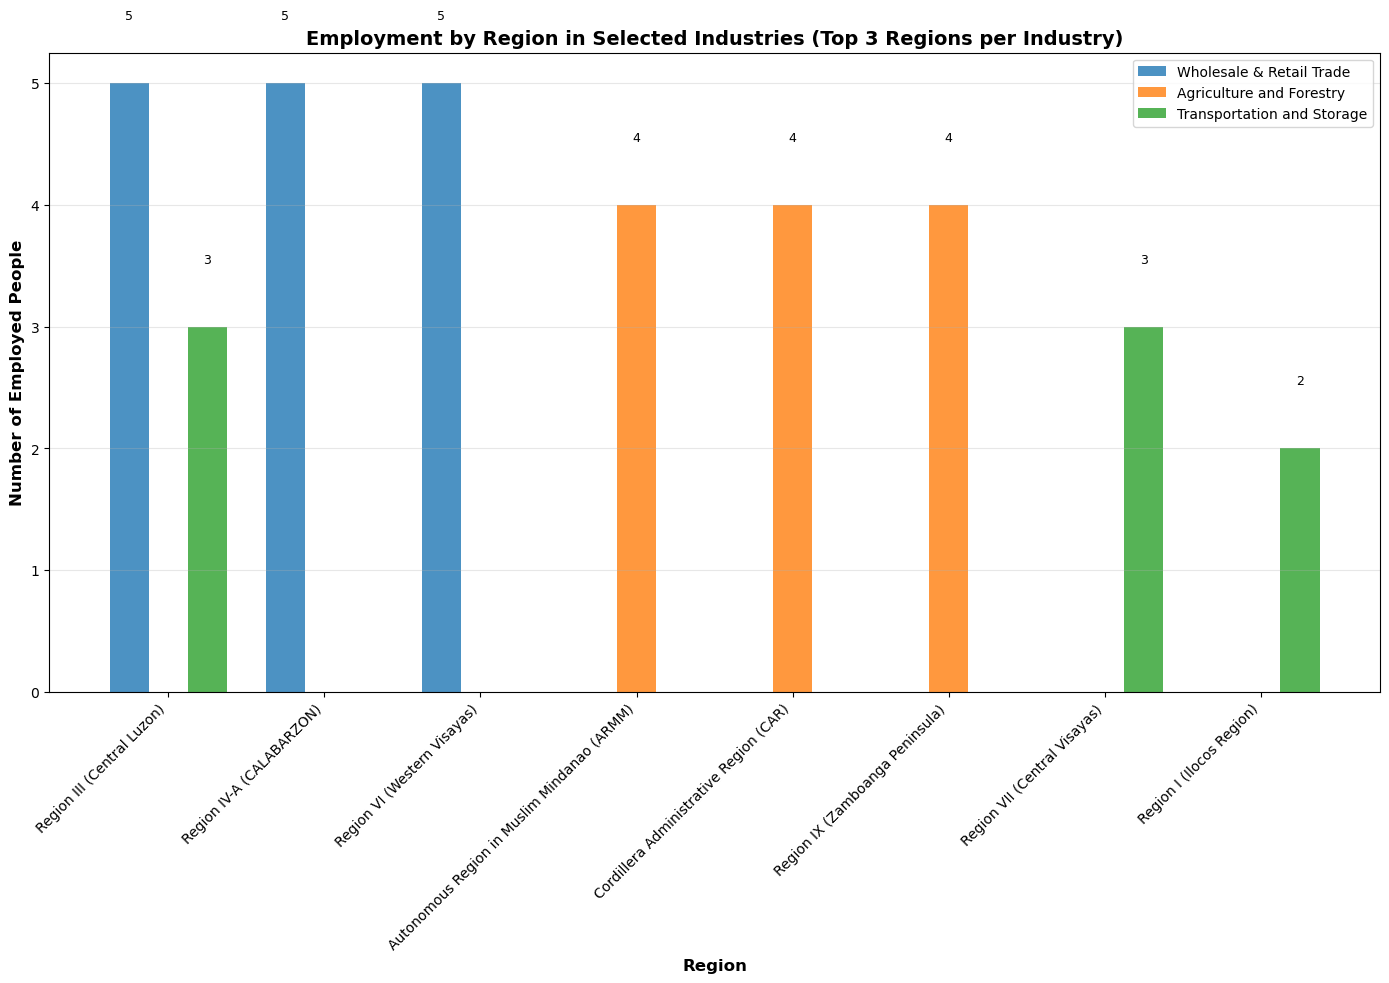

In [12]:
# Define the industries we want to analyze
target_industries = ['Wholesale & Retail Trade', 'Agriculture and Forestry', 'Transportation and Storage']

# Filter data for employed people in target industries
employed_data = df[(df['Employment_Status'] == 'Employed') & 
                   (df['Industry'].isin(target_industries))]

# Group by industry and region to get employment counts
employment_by_region = employed_data.groupby(['Industry', 'Region_Name']).size().reset_index(name='Employed_Count')

# Get top 3 regions for each industry
top_regions_data = []
for industry in target_industries:
    industry_data = employment_by_region[employment_by_region['Industry'] == industry]
    top_3 = industry_data.nlargest(3, 'Employed_Count')
    top_regions_data.append(top_3)

# Combine all top 3 data
plot_data = pd.concat(top_regions_data, ignore_index=True)

# Get all unique regions from top 3 across all industries
all_top_regions = plot_data['Region_Name'].unique()

# Create the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Set up positions for grouped bars
regions = all_top_regions
x = np.arange(len(regions))
width = 0.25

# Create colors for each industry
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
industry_colors = dict(zip(target_industries, colors))

# Plot bars for each industry
for i, industry in enumerate(target_industries):
    industry_data = []
    
    for region in regions:
        region_data = plot_data[(plot_data['Region_Name'] == region) & 
                               (plot_data['Industry'] == industry)]
        if len(region_data) > 0:
            industry_data.append(region_data.iloc[0]['Employed_Count'])
        else:
            industry_data.append(0)
    
    bars = ax.bar(x + i * width, industry_data, width, label=industry, 
                  color=colors[i], alpha=0.8)
    
    # Add value labels on bars
    for j, bar in enumerate(bars):
        if bar.get_height() > 0:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                   f'{int(bar.get_height())}', 
                   ha='center', va='bottom', fontsize=9, rotation=0)

# Customize the plot
ax.set_xlabel('Region', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Employed People', fontsize=12, fontweight='bold')
ax.set_title('Employment by Region in Selected Industries (Top 3 Regions per Industry)', fontsize=14, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(regions, rotation=45, ha='right')
ax.legend()

# Add grid for better readability
ax.grid(True, alpha=0.3, axis='y')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

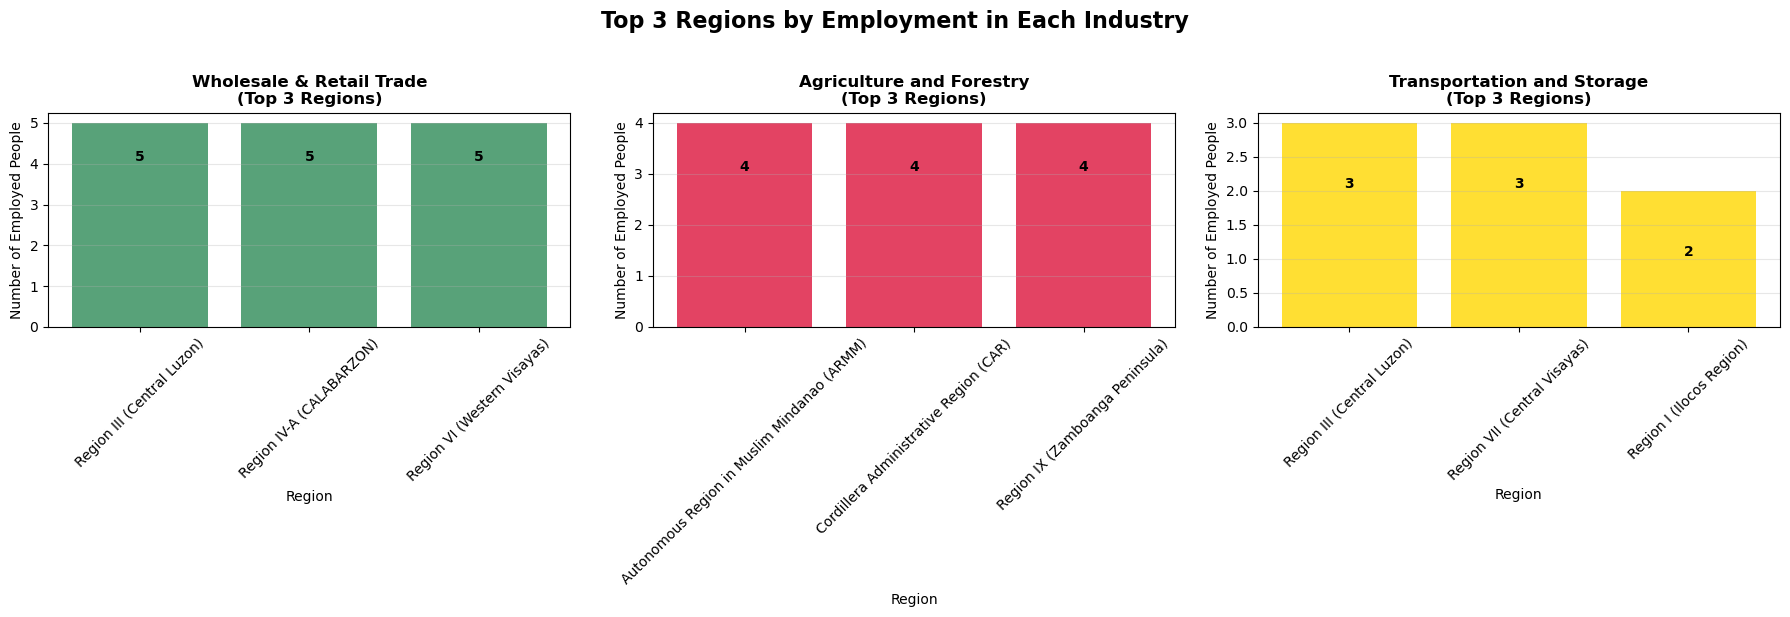

In [16]:
# Define the industries we want to analyze
target_industries = ['Wholesale & Retail Trade', 'Agriculture and Forestry', 'Transportation and Storage']

# Filter data for employed people in target industries
employed_data = df[(df['Employment_Status'] == 'Employed') & 
                   (df['Industry'].isin(target_industries))]

# Group by industry and region to get employment counts
employment_by_region = employed_data.groupby(['Industry', 'Region_Name']).size().reset_index(name='Employed_Count')

# Get top 3 regions for each industry
top_regions_data = []
for industry in target_industries:
    industry_data = employment_by_region[employment_by_region['Industry'] == industry]
    top_3 = industry_data.nlargest(3, 'Employed_Count')
    top_regions_data.append(top_3)

# Combine all top 3 data
plot_data = pd.concat(top_regions_data, ignore_index=True)

# Create separate plots for each industry
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
colors = ['#2E8B57', '#DC143C', '#FFD700']  

for i, industry in enumerate(target_industries):
    # Get top 3 regions for this industry
    industry_data = employment_by_region[employment_by_region['Industry'] == industry]
    top_3 = industry_data.nlargest(3, 'Employed_Count')
    
    # Create bar plot for this industry
    regions = top_3['Region_Name'].tolist()
    employed_counts = top_3['Employed_Count'].tolist()
    
    bars = axes[i].bar(regions, employed_counts, color=colors[i], alpha=0.8)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, height - 1,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Customize each subplot
    axes[i].set_title(f'{industry}\n(Top 3 Regions)', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Number of Employed People', fontsize=10)
    axes[i].set_xlabel('Region', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3, axis='y')
    
    # Set y-axis to start from 0 for better comparison
    axes[i].set_ylim(bottom=0)

# Add overall title
fig.suptitle('Top 3 Regions by Employment in Each Industry', fontsize=16, fontweight='bold', y=1.02)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
# First, let's filter out NA industries and group properly
employment_stats = df[df['Industry'].notna()].groupby(['Region', 'Region_Name', 'Industry', 'Employment_Status']).size().unstack(fill_value=0)

# Calculate totals and rates
employment_stats['Total'] = employment_stats.sum(axis=1)
employment_stats['Employment_Rate'] = (employment_stats['Employed'] / employment_stats['Total'] * 100).round(2)
employment_stats['Unemployment_Rate'] = (employment_stats['Unemployed'] / employment_stats['Total'] * 100).round(2)

# Sort by region and total population for better visualization
employment_stats = employment_stats.sort_values(['Region', 'Total'], ascending=[True, False])

employment_stats

,,Employment_Status,Employed,Unemployed,Total,Employment_Rate,Unemployment_Rate
Region,Region_Name,Industry,,,,,
6,Region VI (Western Visayas),Accommodation and Food Services,2,0,2,100.0,0.0
17,MIMAROPA Region,Accommodation and Food Services,2,0,2,100.0,0.0
2,Region II (Cagayan Valley),Accommodation and Food Services,1,0,1,100.0,0.0
10,Region X (Northern Mindanao),Accommodation and Food Services,1,0,1,100.0,0.0
11,Region XI (Davao Region),Accommodation and Food Services,1,0,1,100.0,0.0
...,...,...,...,...,...,...,...
10,Region X (Northern Mindanao),Wholesale & Retail Trade,2,0,2,100.0,0.0
1,Region I (Ilocos Region),Wholesale & Retail Trade,1,0,1,100.0,0.0
2,Region II (Cagayan Valley),Wholesale & Retail Trade,1,0,1,100.0,0.0


In [7]:
regional_totals = df[df['Industry'].notna()].groupby(['Region', 'Region_Name', 'Employment_Status']).size().unstack(fill_value=0)
regional_totals['Total'] = regional_totals.sum(axis=1)
regional_totals['Employment_Rate'] = (regional_totals['Employed'] / regional_totals['Total'] * 100).round(2)
regional_totals['Unemployment_Rate'] = (regional_totals['Unemployed'] / regional_totals['Total'] * 100).round(2)
regional_totals = regional_totals.sort_values('Total', ascending=False)
regional_totals

,Employment_Status,Employed,Unemployed,Total,Employment_Rate,Unemployment_Rate
Region,Region_Name,,,,,
13,National Capital Region (NCR),13,28,41,31.71,68.29
3,Region III (Central Luzon),15,22,37,40.54,59.46
6,Region VI (Western Visayas),15,18,33,45.45,54.55
17,MIMAROPA Region,13,13,26,50.00,50.00
7,Region VII (Central Visayas),14,11,25,56.00,44.00
8,Region VIII (Eastern Visayas),10,15,25,40.00,60.00
4,Region IV-A (CALABARZON),10,13,23,43.48,56.52
11,Region XI (Davao Region),13,9,22,59.09,40.91
5,Region V (Bicol Region),9,13,22,40.91,59.09


In [39]:
# Reset index to make 'Region_Name' a column (optional if not already a column)
regional_totals_reset = regional_totals.reset_index()

# Extract only Region_Name and Employed columns
region_employed = regional_totals_reset[['Region_Name', 'Employed']]
region_employed

Employment_Status,Region_Name,Employed
0,National Capital Region (NCR),13
1,Region III (Central Luzon),15
2,Region VI (Western Visayas),15
3,MIMAROPA Region,13
4,Region VII (Central Visayas),14
5,Region VIII (Eastern Visayas),10
6,Region IV-A (CALABARZON),10
7,Region XI (Davao Region),13
8,Region V (Bicol Region),9
9,Region IX (Zamboanga Peninsula),9


In [17]:
df

,Randomizer,Region,C10-Job Indicator,"C11 - Location of Work (Province, Municipality)",C15-Major Industry Group,C16-Nature of Employment (Primary Occupation),Region_Name,Employment_Status,Industry
0,1,7,2,0,0,0,Region VII (Central Visayas),Unemployed,NA
1,1,19,1,6617,1,1,Autonomous Region in Muslim Mindanao (ARMM),Employed,Agriculture and Forestry
2,2,7,1,4611,96,1,Region VII (Central Visayas),Employed,Other Service Activities
3,3,2,2,0,0,0,Region II (Cagayan Valley),Unemployed,NA
4,3,13,2,0,0,0,National Capital Region (NCR),Unemployed,NA
...,...,...,...,...,...,...,...,...,...
379,390,4,1,5624,46,1,Region IV-A (CALABARZON),Employed,Wholesale & Retail Trade
380,391,10,1,4308,96,2,Region X (Northern Mindanao),Employed,Other Service Activities
381,391,13,1,7607,82,1,National Capital Region (NCR),Employed,Admin & Support Services
382,391,6,2,0,0,0,Region VI (Western Visayas),Unemployed,NA


In [26]:
# Filter the dataframe for only these industries and select only Industry and Region columns
industry_region = df[df['Industry'].isin(target_industries)][['Industry', 'Region']].copy()

# Sort by Region from most to least (alphabetical order)
industry_region = industry_region.sort_values('Industry', ascending=True)

# Reset the index
industry_region = industry_region.reset_index(drop=True)
industry_region

,Industry,Region
0,Agriculture and Forestry,19
1,Agriculture and Forestry,14
2,Agriculture and Forestry,19
3,Agriculture and Forestry,8
4,Agriculture and Forestry,1
...,...,...
83,Wholesale & Retail Trade,7
84,Wholesale & Retail Trade,19
85,Wholesale & Retail Trade,6
86,Wholesale & Retail Trade,5


In [32]:
# Filter for employed people in target industries
employed_by_region = df[(df['Industry'].isin(target_industries)) & 
                       (df['Employment_Status'] == 'Employed')].groupby(['Industry', 'Region_Name']).size().reset_index(name='Employed_Count')

# Create a pivot table to show industries as columns and regions as rows
pivot_table = employed_by_region.pivot(index='Region_Name', columns='Industry', values='Employed_Count').fillna(0)

# Convert to integers
pivot_table = pivot_table.astype(int)

# Add total column
pivot_table['Total'] = pivot_table.sum(axis=1)

# Sort by total employed (highest to lowest)
pivot_table = pivot_table.sort_values('Total', ascending=False)

# Reset index to make Region_Name a regular column (fixes the download issue)
pivot_table = pivot_table.reset_index()
pivot_table

Industry,Region_Name,Agriculture and Forestry,Transportation and Storage,Wholesale & Retail Trade,Total
0,Region XI (Davao Region),4,2,4,10
1,Autonomous Region in Muslim Mindanao (ARMM),4,1,3,8
2,Region III (Central Luzon),0,3,5,8
3,Region VII (Central Visayas),2,3,2,7
4,Region VI (Western Visayas),2,0,5,7
5,Region IV-A (CALABARZON),0,1,5,6
6,Region VIII (Eastern Visayas),4,0,2,6
7,Region XIII (Caraga),2,0,4,6
8,Region I (Ilocos Region),2,2,1,5
9,Cordillera Administrative Region (CAR),4,0,0,4


In [33]:
pivot_table.to_excel("LFS_region_anova.xlsx", index=False)

In [28]:
industry_region.to_excel("LFS_sample_anova.xlsx", index=False)